# ShellHacks - Plant Classification

### Libraries

In [412]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import pandas as pd

import seaborn as sns

from time import time
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import experimental


__Data Directories__

In [413]:
train_dir = 'Dataset/train'
test_dir = 'Dataset/test'

__List of folders__ (also they are classification names)

In [16]:
diseases = os.listdir(train_dir)
diseases

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

__# of folders (or classifications)__

In [17]:
len(diseases)

33

__Randomly printing 1 picture from each folder__

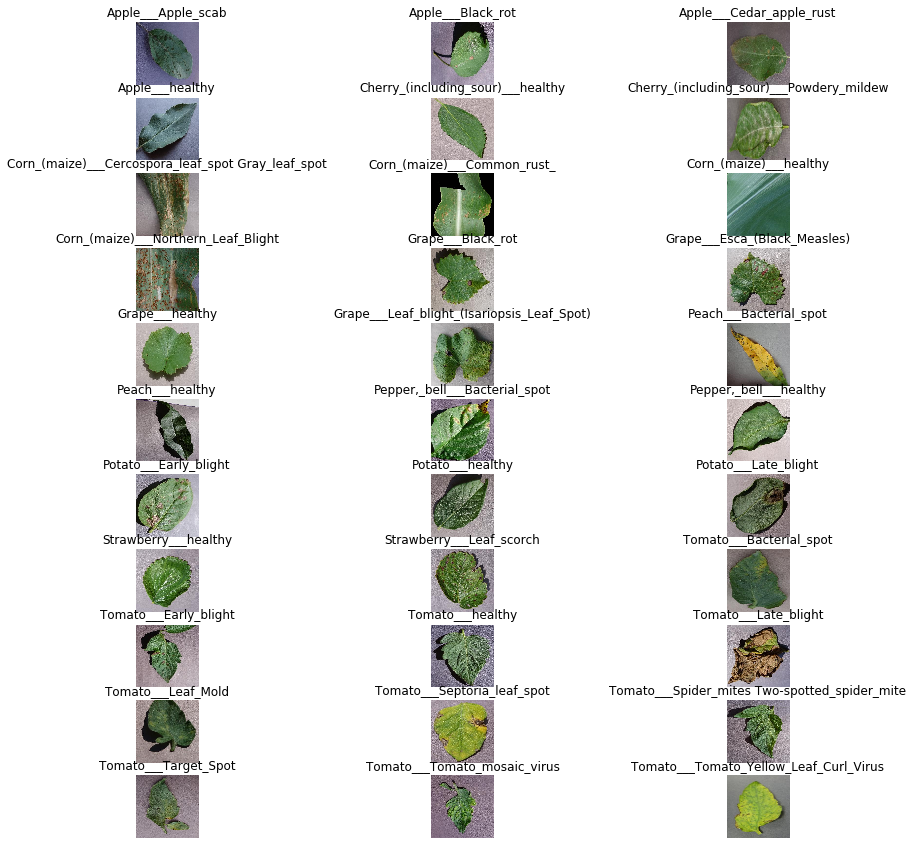

In [11]:
plt.figure(figsize = (15,15))
for i, col in enumerate(os.listdir(train_dir)):
        image = random.choice(os.listdir(train_dir + '/' + col))
        image_path = train_dir + '/' + col + '/' + image
        img = cv2.imread(image_path)
        plt.subplot(11,3,i+1)
        plt.title(col)
        plt.imshow(img[:,:,::-1])
        plt.axis(False)
        i = i + 1

__Splitting Plant name and plant status__

In [27]:
plants = []
num_diseases = 0
num_healthy = 0

for i in diseases:
    if i.split('___')[0] not in plants:
        plants.append(i.split('___')[0])
    if i.split('___')[1] == 'healthy':
        num_healthy += 1
    elif i.split('___')[1] != 'healthy':
        num_diseases += 1

final_plants_name = []
for j in plants:
    if j.split('_')[0] not in final_plants_name:
        final_plants_name.append(j.split('_')[0])

__Name of plants:__

In [28]:
plants

['Apple',
 'Cherry_(including_sour)',
 'Corn_(maize)',
 'Grape',
 'Peach',
 'Pepper,_bell',
 'Potato',
 'Strawberry',
 'Tomato']

In [434]:
final_plants_name #even cleaner names by removing brackets

['Apple',
 'Cherry',
 'Corn',
 'Grape',
 'Peach',
 'Pepper,',
 'Potato',
 'Strawberry',
 'Tomato']

__Number of healthy classification__

In [30]:
num_healthy

9

__Number of disease classification__

In [31]:
num_diseases

24

__Looking at number of pics for each classification in training set__

In [36]:
total_num

{'Apple___Apple_scab': 2017,
 'Apple___Black_rot': 1988,
 'Apple___Cedar_apple_rust': 880,
 'Apple___healthy': 5264,
 'Cherry_(including_sour)___healthy': 2736,
 'Cherry_(including_sour)___Powdery_mildew': 3368,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1644,
 'Corn_(maize)___Common_rust_': 3816,
 'Corn_(maize)___healthy': 3720,
 'Corn_(maize)___Northern_Leaf_Blight': 3152,
 'Grape___Black_rot': 3776,
 'Grape___Esca_(Black_Measles)': 4428,
 'Grape___healthy': 1356,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 3444,
 'Peach___Bacterial_spot': 7352,
 'Peach___healthy': 1152,
 'Pepper,_bell___Bacterial_spot': 3193,
 'Pepper,_bell___healthy': 4725,
 'Potato___Early_blight': 3200,
 'Potato___healthy': 488,
 'Potato___Late_blight': 3200,
 'Strawberry___healthy': 1460,
 'Strawberry___Leaf_scorch': 3552,
 'Tomato___Bacterial_spot': 6808,
 'Tomato___Early_blight': 3200,
 'Tomato___healthy': 5089,
 'Tomato___Late_blight': 6109,
 'Tomato___Leaf_Mold': 3048,
 'Tomato___Septoria_leaf

__Making a dataframe__

In [41]:
total_num = {}
for i in diseases:
    total_num[i] = len(os.listdir(train_dir + '/' + i))

Num_images = pd.DataFrame(total_num.values(), index=total_num.keys(), columns=["Total Images"])
Num_images

,Total Images
Apple___Apple_scab,2017
Apple___Black_rot,1988
Apple___Cedar_apple_rust,880
Apple___healthy,5264
Cherry_(including_sour)___healthy,2736
Cherry_(including_sour)___Powdery_mildew,3368
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1644
Corn_(maize)___Common_rust_,3816
Corn_(maize)___healthy,3720
Corn_(maize)___Northern_Leaf_Blight,3152


__Barplot showing most popular and least popular classification__

<Figure size 3600x360 with 0 Axes>

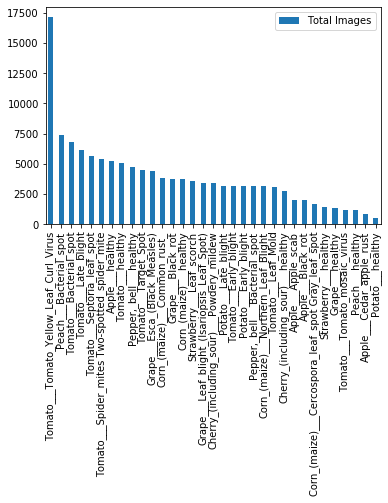

In [63]:
plt.figure(figsize=(50,5))
Num_images.sort_values(by=['Total Images'],  ascending=False).plot(kind='bar')

__Total images__

In [436]:
total_img = 0
for i in range(len(Num_images)):
    total_img += Num_images['Total Images'][i]
total_img

128033

---

__Setting sizes of images__

In [85]:
img_height = 224
img_width = 224
batch_size = 100

In [89]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=69,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 128028 files belonging to 33 classes.


In [91]:
testing_set =  tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=69,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 31956 files belonging to 33 classes.


__Data Augmentation__

In [172]:
train_data = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='training') # set as training data

validation_generator = train_data.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation') # set as validation data

Found 102436 images belonging to 33 classes.
Found 25592 images belonging to 33 classes.


### Deep learning model

In [265]:
classes = train_generator.class_indices

In [266]:
CNN = tf.keras.models.Sequential([
  experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(classes), activation= 'softmax')
])

In [267]:
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

__MODEL DESIGN__

In [268]:
CNN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 52, 52, 128)      

__Training the model__

In [269]:
Model1 = CNN.fit(train_generator, validation_data= validation_generator ,epochs = 5)

Epoch 1/5
1025/1025 [==============================] - 1298s 1s/step - loss: 0.8312 - accuracy: 0.7501 - val_loss: 0.4579 - val_accuracy: 0.8573
Epoch 2/5
1025/1025 [==============================] - 1365s 1s/step - loss: 0.2759 - accuracy: 0.9090 - val_loss: 0.2483 - val_accuracy: 0.9184
Epoch 3/5
1025/1025 [==============================] - 1431s 1s/step - loss: 0.1742 - accuracy: 0.9409 - val_loss: 0.2142 - val_accuracy: 0.9309
Epoch 4/5
1025/1025 [==============================] - 1339s 1s/step - loss: 0.1402 - accuracy: 0.9533 - val_loss: 0.1722 - val_accuracy: 0.9428
Epoch 5/5
1025/1025 [==============================] - 1338s 1s/step - loss: 0.1158 - accuracy: 0.9600 - val_loss: 0.1983 - val_accuracy: 0.9396


__Saving model__

In [270]:
CNN.save('CNN_model_2.h5')

In [414]:
CNN.save('CNN_model_3.pb')

INFO:tensorflow:Assets written to: CNN_model_3.pb\assets


In [271]:
Model1.history

{'loss': [0.8312119841575623,
  0.27591052651405334,
  0.17417064309120178,
  0.14023099839687347,
  0.1158236637711525],
 'accuracy': [0.7501464486122131,
  0.9089773297309875,
  0.9408704042434692,
  0.9532878994941711,
  0.9600433707237244],
 'val_loss': [0.45790860056877136,
  0.24833472073078156,
  0.21422606706619263,
  0.17219063639640808,
  0.19832733273506165],
 'val_accuracy': [0.8573382496833801,
  0.9183729290962219,
  0.9308768510818481,
  0.9427555203437805,
  0.9395905137062073]}

__Graphing model performance and loss__

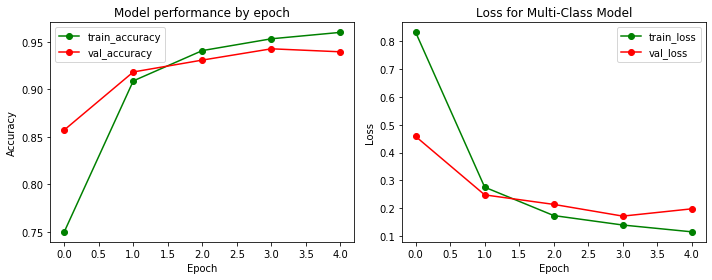

In [272]:
plt.subplots(1,2,figsize =(10,4))

# Let's plot the loss over the 10 epochs
plt.subplot(1,2,1)
plt.title('Model performance by epoch')
plt.plot(Model1.history['accuracy'],'go-')
plt.plot(Model1.history['val_accuracy'],'ro-')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Let's see the loss over 
plt.subplot(1,2,2)
plt.title('Loss for Multi-Class Model')
plt.plot(Model1.history['loss'],'go-')
plt.plot(Model1.history['val_loss'],'ro-')
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

__Prepping test set__

In [273]:
test_gen = ImageDataGenerator()

test_set = test_gen.flow_from_directory(test_dir,
                                        target_size = (img_width,img_height),
                                        batch_size = batch_size,
                                        class_mode="sparse",
                                        shuffle=False)

Found 31956 images belonging to 33 classes.


__Accuracy of Training set__

In [274]:
Model1.history['accuracy'][-1]

0.9600433707237244

__Accuracy of validation set__

In [275]:
Model1.history['val_accuracy'][-1]

0.9395905137062073

__Loss and accuracy of test set__

In [276]:
CNN.evaluate(test_set)

320/320 [==============================] - 67s 209ms/step - loss: 0.3884 - accuracy: 0.8987


[0.38836488127708435, 0.898704469203949]

__Predicting test set__

In [277]:
predictions = CNN.predict(test_set)
trueClass=test_set.classes[test_set.index_array]

In [278]:
predictedClass = np.argmax(predictions, axis=1)

In [279]:
target_names = list(test_set.class_indices.keys())
target_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [280]:
conf_mat=confusion_matrix(y_true=trueClass, y_pred=predictedClass)

In [281]:
conf_mat

array([[ 484,    8,    0, ...,    0,    0,    0],
       [   2,  494,    0, ...,    0,    0,    0],
       [   0,    0,  206, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 4086,   17,    1],
       [   0,    0,    0, ...,    0,  204,    0],
       [   0,    0,    0, ...,    0,    0, 1272]], dtype=int64)

In [282]:
test_set.class_indices.keys()

dict_keys(['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'])

__Confusion matrix__

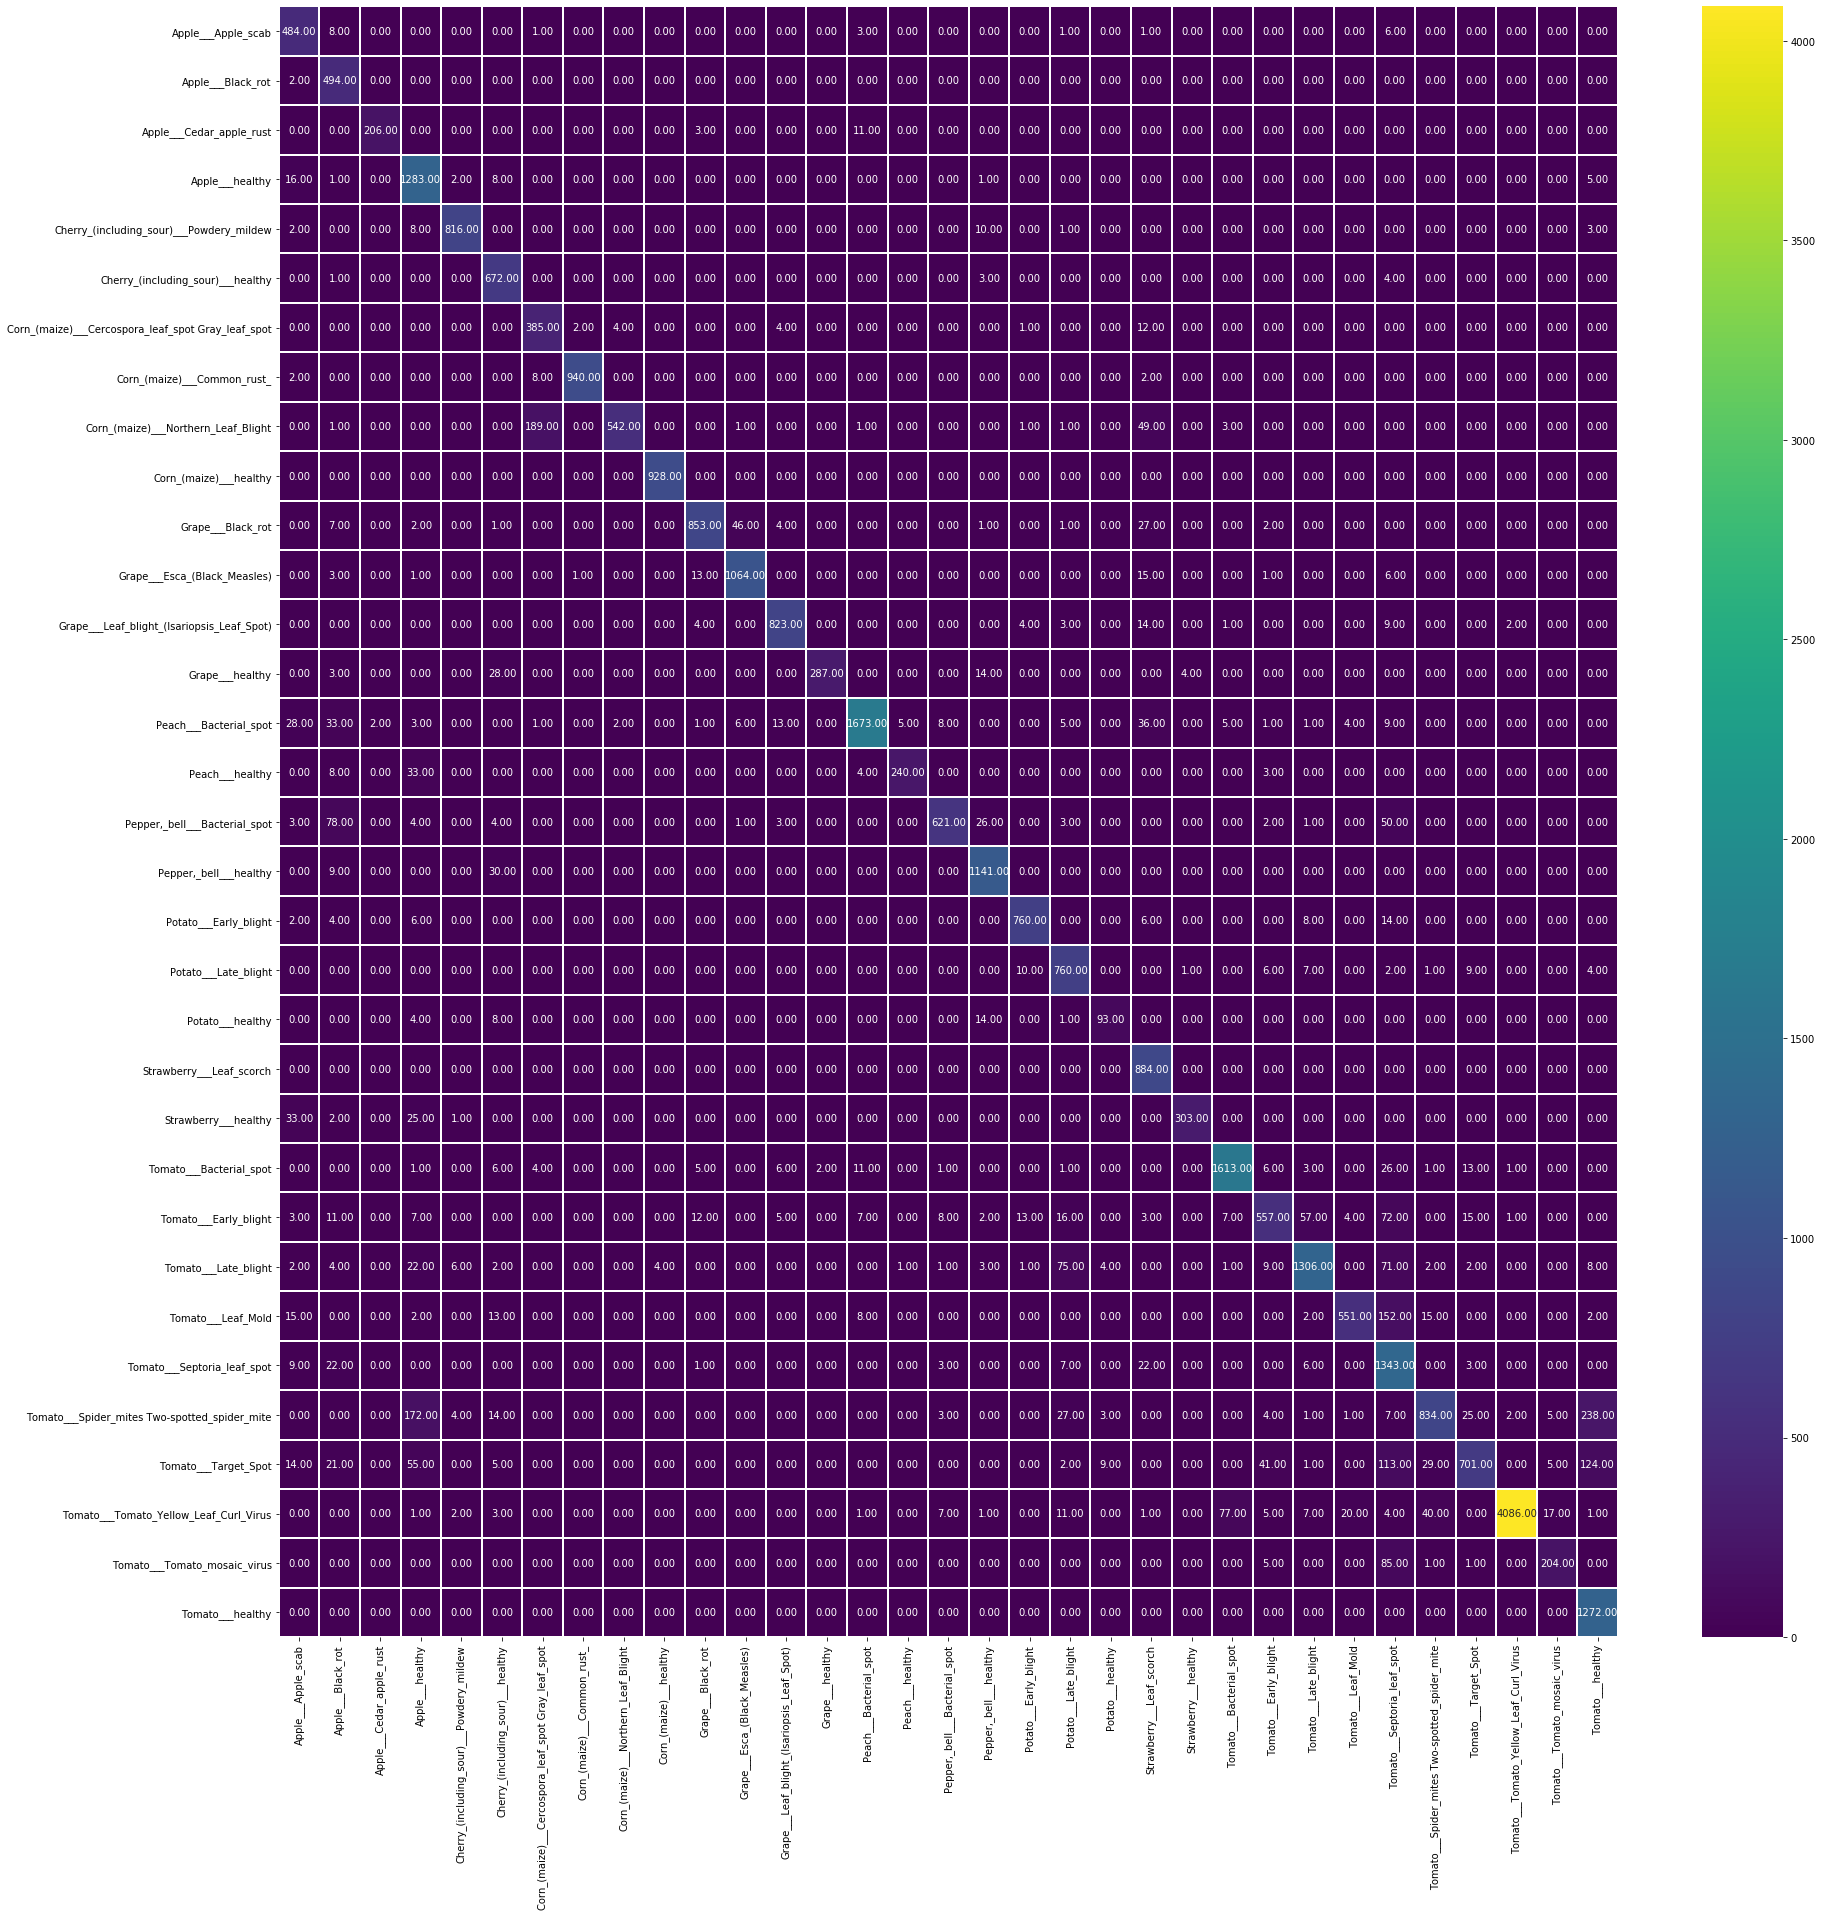

In [283]:
plt.subplots(figsize=(30,30))
sns.heatmap(conf_mat,
            annot=True,
            cbar=True,
            xticklabels=list(test_set.class_indices.keys()),
            yticklabels=list(test_set.class_indices.keys()),
            cmap="viridis",
            linewidths=1,
            fmt='.2f'
           )

In [284]:
print(classification_report(trueClass, predictedClass, target_names=target_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.79      0.96      0.87       504
                                 Apple___Black_rot       0.70      1.00      0.82       496
                          Apple___Cedar_apple_rust       0.99      0.94      0.96       220
                                   Apple___healthy       0.79      0.97      0.87      1316
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       840
                 Cherry_(including_sour)___healthy       0.85      0.99      0.91       680
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.65      0.94      0.77       408
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       952
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.69      0.81       788
                            Corn_(maize)___healthy       1.00      1.00      1.

__ROC Curves__

<Figure size 432x288 with 0 Axes>

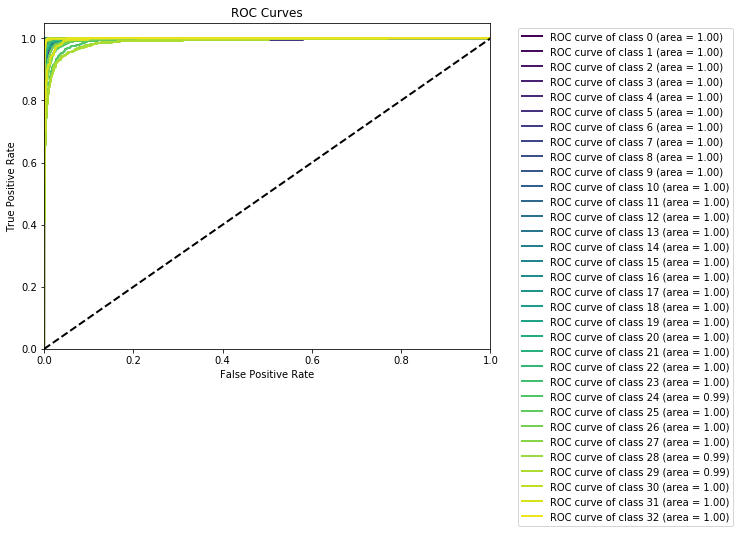

In [285]:
# Generatring the ROC curve using the Scikitplot's plot_roc method
import scikitplot as skplt

plt.figure()
skplt.metrics.plot_roc(y_true=trueClass,
                       y_probas=predictions,
                       title='ROC Curves',
                       plot_micro=False,
                       plot_macro=False,
                       classes_to_plot=None,
                       figsize=(8, 6),
                       cmap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

---

__Importing pics from directory to test out__

In [403]:
img_dir = "Dataset/test/Apple___healthy/00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669_90degFlipTB.JPG"

In [404]:
img = tf.keras.preprocessing.image.load_img(
    img_dir, grayscale=False, color_mode="rgb", target_size=(img_width,img_height), interpolation="nearest"
)

In [429]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)
images = np.vstack([x])

In [406]:
dict = {
0:'Apple___Apple_scab',
1:'Apple___Black_rot',
2:'Apple___Cedar_apple_rust',
3:'Apple___healthy',
4:'Cherry_(including_sour)___Powdery_mildew',
5:'Cherry_(including_sour)___healthy',
6:'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
7:'Corn_(maize)___Common_rust_',
8:'Corn_(maize)___Northern_Leaf_Blight',
9:'Corn_(maize)___healthy',
10:'Grape___Black_rot',
11:'Grape___Esca_(Black_Measles)',
12:'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
13:'Grape___healthy',
14:'Peach___Bacterial_spot',
15:'Peach___healthy',
16:'Pepper,_bell___Bacterial_spot',
17:'Pepper,_bell___healthy',
18:'Potato___Early_blight',
19:'Potato___Late_blight',
20:'Potato___healthy',
21:'Strawberry___Leaf_scorch',
22:'Strawberry___healthy',
23:'Tomato___Bacterial_spot',
24:'Tomato___Early_blight',
25:'Tomato___Late_blight',
26:'Tomato___Leaf_Mold',
27:'Tomato___Septoria_leaf_spot',
28:'Tomato___Spider_mites Two-spotted_spider_mite',
29:'Tomato___Target_Spot',
30:'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
31:'Tomato___Tomato_mosaic_virus',
32:'Tomato___healthy'
}

In [431]:
model  = tf.keras.models.load_model('CNN_model.h5')
model

In [433]:
model2 = tf.keras.models.load_model('CNN_model_2.h5')
model2

In [415]:
model3 = tf.keras.models.load_model('CNN_model_3.pb')
model3

In [427]:
preds = model3.predict(images, batch_size = 100)
predictedClass = np.argmax(preds, axis=1)
predictedClass = np.vectorize(dict.get)(predictedClass)

In [417]:
preds

array([[3.35248814e-07, 2.75552151e-14, 4.41130689e-17, 9.99999166e-01,
        4.19450885e-07, 1.92407190e-17, 5.67566962e-14, 8.08324641e-22,
        3.00454564e-17, 1.78714343e-16, 2.87286203e-22, 2.92433041e-23,
        3.48620252e-22, 3.92017806e-16, 2.66739823e-14, 1.29266294e-17,
        2.43257986e-17, 3.12479322e-17, 2.86588602e-17, 2.66117652e-19,
        7.15791007e-24, 1.97143272e-21, 2.30051480e-15, 4.93030519e-15,
        1.09805745e-16, 1.07218925e-20, 4.09577797e-12, 4.39846905e-17,
        2.55975114e-15, 3.67264817e-17, 9.43190472e-22, 1.38806622e-28,
        5.05203749e-16]], dtype=float32)

In [418]:
Plant = predictedClass[0].split('___')[0]
Status = predictedClass[0].split('___')[1]
Probability = np.max(preds)

print(f"Plant: {Plant}, Status: {Status}, Probability: {Probability}" )

Plant: Apple, Status: healthy, Probability: 0.9999991655349731
